In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

data = pd.read_csv("raw/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv", encoding="euc-kr")
data.head(1)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202308,1호선,동대문,546,25,10772,1896,8832,6226,13629,...,8425,542,2279,1,193,0,0,0,0,20230903


In [4]:
start_date = 201801 
end_date = 202212 # 2022년 12월
df = data[(data['사용월'] >= start_date) & (data['사용월'] <= end_date)]
df = df.iloc[:, :-1]
df.tail(2)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
40999,201801,중앙선,팔당,8,0,190,32,532,269,1508,...,177,256,35,87,0,0,0,0,0,0
41000,201801,중앙선,회기,510,45,10057,3582,21231,10670,63412,...,16002,32276,935,9242,0,0,0,0,0,0


In [12]:
sub = df.iloc[:, [-1, 0, 1, 2]]
sub.head()

,날짜,사용월,호선명,지하철역
4915,2022-12,12,1호선,동대문
4916,2022-12,12,1호선,동묘앞
4917,2022-12,12,1호선,서울역
4918,2022-12,12,1호선,시청
4919,2022-12,12,1호선,신설동


In [13]:
# 승차 정보만 처리

on = df.iloc[:, 3:]
on = on.iloc[:,[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46]]
on.rename(columns={'04시-05시 승차인원':'4시', '05시-06시 승차인원':'5시', '06시-07시 승차인원':'6시','07시-08시 승차인원':'7시',
                       '08시-09시 승차인원':'8시','09시-10시 승차인원':'9시','10시-11시 승차인원':'10시','11시-12시 승차인원':'11시',
                       '12시-13시 승차인원':'12시','13시-14시 승차인원':'13시','14시-15시 승차인원':'14시','15시-16시 승차인원':'15시',
                      '16시-17시 승차인원':'16시','17시-18시 승차인원':'17시','18시-19시 승차인원':'18시','19시-20시 승차인원':'19시',
                      '20시-21시 승차인원':'20시','21시-22시 승차인원':'21시','22시-23시 승차인원':'22시','23시-24시 승차인원':'23시',
                      '00시-01시 승차인원':'24시','01시-02시 승차인원':'1시','02시-03시 승차인원':'2시','03시-04시 승차인원':'3시'}, inplace=True)

# 기존 지하철 정보와 승차 정보 합체
on = pd.concat([sub, on], axis=1)
on.head()

,날짜,사용월,호선명,지하철역,4시,5시,6시,7시,8시,9시,...,18시,19시,20시,21시,22시,23시,24시,1시,2시,3시
4915,2022-12,12,1호선,동대문,762,10546,8505,13440,18824,18641,...,23840,17073,14042,13368,10411,4793,588,23,1,0
4916,2022-12,12,1호선,동묘앞,194,2748,3605,6064,10633,8934,...,16538,7857,5220,4406,3394,1358,122,2,0,0
4917,2022-12,12,1호선,서울역,604,8028,12137,38148,66885,57091,...,211286,111667,83684,86082,59774,26461,2776,43,1,0
4918,2022-12,12,1호선,시청,127,2197,3713,7195,9565,11529,...,164532,68288,59372,59335,39531,13533,1934,102,2,0
4919,2022-12,12,1호선,신설동,348,8308,8716,20270,30116,19563,...,50985,20215,14664,12664,9080,3964,393,13,0,0


In [14]:
on['합'] = on.iloc[:, 4:].sum(axis=1)
on.head()

,날짜,사용월,호선명,지하철역,4시,5시,6시,7시,8시,9시,...,19시,20시,21시,22시,23시,24시,1시,2시,3시,합
4915,2022-12,12,1호선,동대문,762,10546,8505,13440,18824,18641,...,17073,14042,13368,10411,4793,588,23,1,0,350825
4916,2022-12,12,1호선,동묘앞,194,2748,3605,6064,10633,8934,...,7857,5220,4406,3394,1358,122,2,0,0,271558
4917,2022-12,12,1호선,서울역,604,8028,12137,38148,66885,57091,...,111667,83684,86082,59774,26461,2776,43,1,0,1547314
4918,2022-12,12,1호선,시청,127,2197,3713,7195,9565,11529,...,68288,59372,59335,39531,13533,1934,102,2,0,769469
4919,2022-12,12,1호선,신설동,348,8308,8716,20270,30116,19563,...,20215,14664,12664,9080,3964,393,13,0,0,402903


In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [10]:
import platform
print(platform.system())
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

Windows


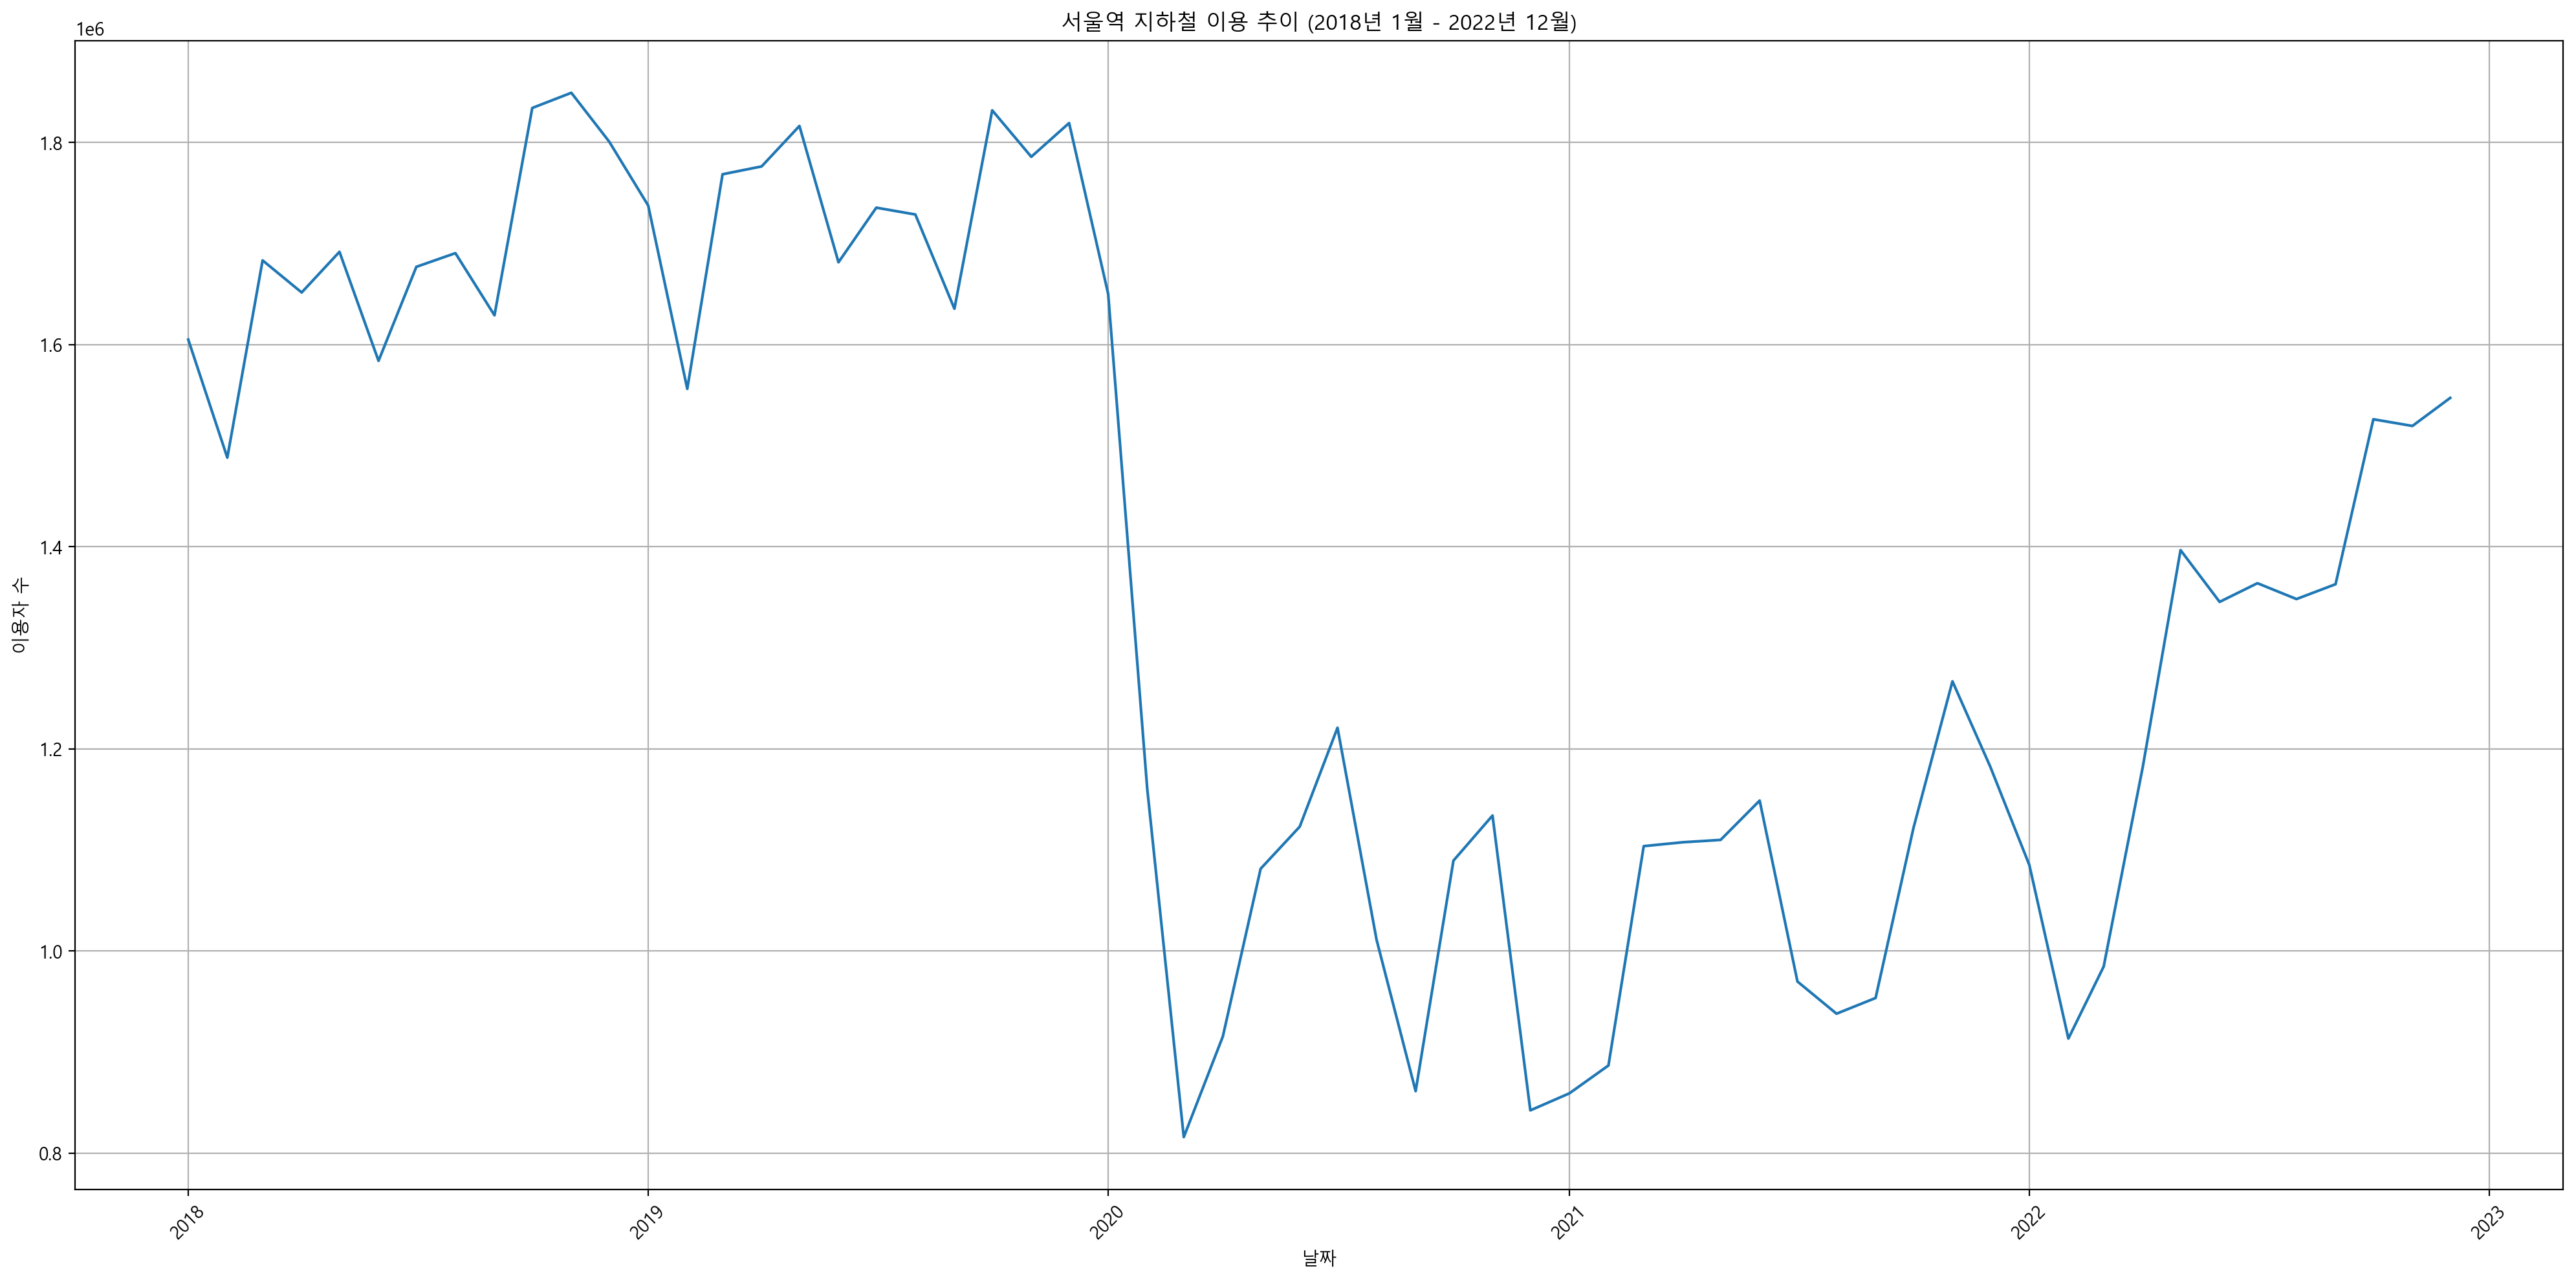

In [28]:
# 필터링: 서울역의 데이터만 선택
seoul_station_data = on[(on['지하철역'] == '서울역') & (on['호선명'] == '1호선')]

# 날짜 열을 날짜 형식으로 변환
seoul_station_data['날짜'] = pd.to_datetime(seoul_station_data['날짜'], format='%Y-%m')

# 그래프 그리기
plt.figure(figsize=(20, 10))
plt.plot(seoul_station_data['날짜'], seoul_station_data['합'])
plt.title('서울역 지하철 이용 추이 (2018년 1월 - 2022년 12월)')
plt.xlabel('날짜')
plt.ylabel('이용자 수')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()

,날짜,사용월,호선명,지하철역,4시,5시,6시,7시,8시,9시,...,19시,20시,21시,22시,23시,24시,1시,2시,3시,합
4917,2022-12,12,1호선,서울역,604,8028,12137,38148,66885,57091,...,111667,83684,86082,59774,26461,2776,43,1,0,1547314
5022,2022-12,12,4호선,서울역,205,4187,5962,11916,14685,13363,...,24141,15938,14837,11537,5314,654,16,0,0,347311
5255,2022-12,12,경부선,서울역,5,42,102,8477,21186,16062,...,18428,12580,16921,13291,7021,1130,2,0,0,287459
5322,2022-12,12,경의선,서울역,0,681,1002,2496,2800,2397,...,11009,6267,6970,1231,2661,0,0,0,0,115230
5384,2022-12,12,공항철도 1호선,서울역,242,3199,3001,11146,14722,13139,...,25984,20628,22533,16982,10019,170,0,0,0,356979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40520,2018-1,1,4호선,서울역,194,4703,6699,12392,18604,13959,...,33235,21180,18868,14380,7288,934,2,0,0,386879
40747,2018-1,1,경부선,서울역,5,59,64,6332,16882,9876,...,13467,9018,13914,8779,3912,1033,2,0,0,197940
40815,2018-1,1,경의선,서울역,3,589,936,1378,2331,1164,...,9430,8686,1487,3346,1921,1,0,0,0,80413
40816,2018-1,1,경의선,서울역,0,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,8
